# Computational Physics Tutorial 3

## SNGNKO003

### The 3-Body Problem and the Runge-Kutta Method

Here, we first import all the packages we're going to use.

In [36]:
import numpy as np
import matplotlib.pyplot as plt

We're given a 3-body problem where we are going to study the influence of Mars on the period of the Earth around the Sun. We need to use the Runge-Kutta method to calculate the orbits of Mars and Earth around the Sun. We use a simplified model of the solar system where we're only looking at the Sun, Earth and Mars, disregarding the rest of the planets,their moons and the astroid belt between Mars and Jupiter. We assume that all the orbits are on one plane i.e. The x-y plane. We also assume that the Semi-Major Axis of Earth and Mars coincide i.e. they are on the same line of sight from the center of mass initially. The Simulation starts with both Earth and Mars at their closest point to the center of mass.

Before we even start simulating anything, we need to determine the equations of motion of the system therefore we need to identify all the forces acting on each body. We are going to first neglect the gravitational force between Earth and Mars which leaves us with a not so complicated Force equation. The only force that will be acting on Earth will be due to the Sun. That's also the case for Mars. So we have:

$$\frac{d^2r_1}{dt^2} = -GM_2 \frac{r_1 - r_2}{|r_1 - r_2|^3}$$

This is just the acceleration of body 1 due to body 2. So our case, the acceleration of the Sun due to Earth and Mars would be given by:


$$ \frac{d^2r_{sun}}{dt^2} = -GM_{earth} \frac{r_{sun} - r_{earth}}{|r_{sun} - r_{earth}|^3} - GM_{mars} \frac{r_{sun} - r_{mars}}{|r_{sun} - r_{mars}|^3} $$ 

whereas the acceleration of the Earth and Mars will be given by:

$$\frac{d^2r_{earth}}{dt^2} = -GM_{sun} \frac{r_{earth} - r_{sun}}{|r_{earth} - r_{sun}|^3}$$

$$\frac{d^2r_{mars}}{dt^2} = -GM_{sun} \frac{r_{mars} - r_{sun}}{|r_{mars} - r_{sun}|^3}$$

Where $r$ is the position of the body with respect to the center of mass, $r$ is given by (in cartesian coordinates):

$$r = \sqrt{x^2 + y^2}$$

We have 3 gravitational bodies here, each with its associated differential equation which can be separated into two parts. So each body has two differential equations, one with respect to x and one with respect to y. This implies that we have a total of 12 Ordinary Differential Equations that we need to solve numerically using the 4th order Runge-kutta method.

The code below intiates our system and places constants needed to generate our system.

In [37]:
### Constants ###
G = 6.67430e-11             #Gravitational Constant
Msun = 1988500e24           #kg
Mearth = 5.9724e24          #kg
Mmars = 0.64171e24          #kg
AU = 1.496e11               #m
rearth = 0.9832899*AU       #m
rmars = 1.3813334*AU        #m
vearth = 30287.4            #m/s
vmars = 26499.8             #m/s
a = 0.0
b = 1.0
rsun = 0.0

dt = 100000
tmax = 20*365.25*24*3600     #s
n_steps = int(tmax / dt)

# Define the equations of motion for the 2-body problem
m1 = Msun
m2 = Mearth
m3 = Mmars
x1 = rsun
x2 = rearth
x3 = rmars
y1 = 0.0
y2 = 0.0
y3 = 0.0
vx1 = 0.0
vx2 = 0.0 
vx3 = 0.0
vy1 = 0.0
vy2 = vearth
vy3 = vmars

N=int(n_steps)
alp = np.array([x1, x2, x3, y1, y2, y3, vx1, vx2, vx3, vy1, vy2, vy3])  ### an array that stores information about the initial state of the system
m=12

h=dt
t=a
### Empty arrays to be appended later during the implementation of Runge-Kutta
w=[0,0,0,0,0,0,0,0,0,0,0,0]
K1=[0,0,0,0,0,0,0,0,0,0,0,0]
K2=[0,0,0,0,0,0,0,0,0,0,0,0]
K3=[0,0,0,0,0,0,0,0,0,0,0,0]
K4=[0,0,0,0,0,0,0,0,0,0,0,0]

### Defining a function of the velocities and accelerations of the 3 bodies in out system.
def f(t,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12):
    ax1 = 0                                             # acceleration for the Sun, the Earth and Mars are too light to accelerate it.
    ay1 = 0

    ax2 = - G*m1*(u2-u1)/((u2-u1)**2+(u5-u4)**2)**(3/2) # acceleration for Earth
    ay2 = - G*m1*(u5-u4)/((u2-u1)**2+(u5-u4)**2)**(3/2)

    ax3 = -G*m1*(u3-u1)/((u3-u1)**2+(u6-u4)**2)**(3/2)  # acceleration for Mars
    ay3 = -G*m1*(u6-u4)/((u3-u1)**2+(u6-u4)**2)**(3/2) 
    
    return [u7, u8, u9, u10, u11, u12, ax1, ax2, ax3, ay1, ay2, ay3]

for j in range(m):
    w[j] = alp[j]

### arrays for the starting with the initial conditions stored in "alp" updated positions, velocities and accelerations for the 3 bodies
t_vals = [t]
x1_vals = [w[0]]
x2_vals = [w[1]]
x3_vals = [w[2]]
y1_vals = [w[3]]
y2_vals = [w[4]]
y3_vals = [w[5]]
vx1_vals = [w[6]]
vx2_vals = [w[7]]
vx3_vals = [w[8]]
vy1_vals = [w[9]]
vy2_vals = [w[10]]
vy3_vals = [w[11]]

Now that we have the positions, velocities and accelerations; we can start to implement the 4th Order Runge-Kutta method to solve the entire system of ODEs.


We first note here that
$u_1$,$u_2$ and $u_3$ 
are the positions in $x$ for bodies 1, 2, and 3 respectively.

And $u_4$,$u_5$ and $u_6$ are the positions in $y$ for bodies 1, 2, and 3 respectively. The same trend follows for the velocities in $x$ and then $y$, and for accelerations as well.


The code below then calculates and updates the values of $K1$, $K2$, $K3$ and $K4$ to be used to update the state of the system after a small time step $dt$.

The updated state is given by:

$$y(t+dt) = y(t) + \frac{1}{6}\left(K_1 + 2K_2 + 2K_3 + K_4\right)$$ 

where:

$$K_1 = dt \times f\left(t,y(t)\right)$$
$$K_2 = dt \times f\left(t+\frac{dt}{2},y(t)+\frac{K_1}{2}\right)$$
$$K_3 = dt \times f\left(t+\frac{dt}{2},y(t)+\frac{K_2}{2}\right)$$
$$K_4 = dt \times f\left(t+dt,y(t)+K_3\right)$$

with $f$ being the function with the velocities and acceleration defined in the code above.

In [38]:
### computing the k1,k2,k3 and k4 values that we'll use to update the positions and velocities of the system.
    
for i in range(N+1):
    for j in range(m):
        K1[j] = h*f(t,w[0],w[1],w[2],w[3],w[4],w[5],w[6],w[7],w[8],w[9],w[10],w[11])[j]
    for j in range(m):
        K2[j] = h*f(t+h/2, w[0]+K1[0]/2, w[1]+K1[1]/2, w[2]+K1[2]/2, w[3]+K1[3]/2,
                    w[4]+K1[4]/2, w[5]+K1[5]/2, w[6]+K1[6]/2, w[7]+K1[7]/2, w[8]+K1[8]/2, 
                    w[9]+K1[9]/2, w[10]+K1[10]/2, w[11]+K1[11]/2)[j]
    for j in range(m):
        K3[j] = h*f(t+h/2, w[0]+K2[0]/2, w[1]+K2[1]/2, w[2]+K2[2]/2, w[3]+K2[3]/2,
                    w[4]+K2[4]/2, w[5]+K2[5]/2, w[6]+K2[6]/2, w[7]+K2[7]/2, w[8]+K2[8]/2, 
                    w[9]+K2[9]/2, w[10]+K2[10]/2, w[11]+K2[11]/2)[j]
    for j in range(m):
        K4[j] = h*f(t+h, w[0]+K3[0], w[1]+K3[1], w[2]+K3[2], w[3]+K3[3],
                    w[4]+K3[4], w[5]+K3[5], w[6]+K3[6], w[7]+K3[7], w[8]+K3[8], 
                    w[9]+K3[9], w[10]+K3[10], w[11]+K3[11])[j]
    for j in range(m):
        w[j] = w[j]+(K1[j]+2*K2[j]+2*K3[j]+K4[j])/6  ### Updating the positions and velocities for the 3 bodies
    t=a+(i+1)*h
    t_vals.append(t)
    x1_vals.append(w[0])
    x2_vals.append(w[1])
    x3_vals.append(w[2])
    y1_vals.append(w[3])
    y2_vals.append(w[4])
    y3_vals.append(w[5])
    vx1_vals.append(w[6])
    vx2_vals.append(w[7])
    vx3_vals.append(w[8])
    vy1_vals.append(w[9])
    vy2_vals.append(w[10])
    vy3_vals.append(w[11])

We now want to see how these orbits visually look like. So we plot them.

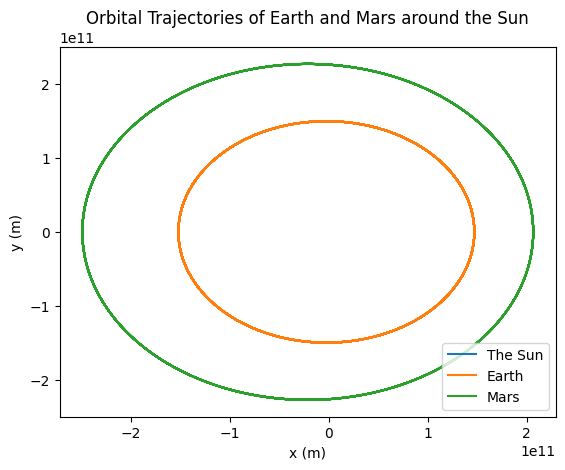

In [39]:
#Plot the trajectories of the two bodies
plt.plot(x1_vals, y1_vals, label='The Sun')
plt.plot(x2_vals, y2_vals, label='Earth')
plt.plot(x3_vals, y3_vals, label='Mars')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Orbital Trajectories of Earth and Mars around the Sun')
plt.legend()
plt.show()

These orbits look promising, one way to confirm is to compute their eccentricities. We calculate eccentricities using the expression:

$$e = \frac{r_a - r_p}{r_a + r_p}$$

where $r_a$ is the furthest distance of the planet from the center of mass and $r_p$ is the nearest distance of the planet from the center of mass.

The code below computes and prints the eccentricities for both Earth and Mars.

In [40]:
### Calculating the orbital eccentricities for both Earth and Mars ###
r_earth = np.sqrt(np.array(x2_vals)**2 + np.array(y2_vals)**2)
rp_earth = np.min(np.sqrt(np.array(x2_vals)**2 + np.array(y2_vals)**2))
ra_earth = np.max(np.sqrt(np.array(x2_vals)**2 + np.array(y2_vals)**2))

r_mars = np.sqrt(np.array(x3_vals)**2 + np.array(y3_vals)**2)
rp_mars = np.min(np.sqrt(np.array(x3_vals)**2 + np.array(y3_vals)**2))
ra_mars = np.max(np.sqrt(np.array(x3_vals)**2 + np.array(y3_vals)**2))

e_earth = (ra_earth - rp_earth) / (ra_earth + rp_earth)
e_mars = (ra_mars - rp_mars) / (ra_mars + rp_mars)

print('The orbital eccentricity for Earth is: ', e_earth)
print('The orbital eccentricity for Mars is: ', e_mars)

The orbital eccentricity for Earth is:  0.016730466789743853
The orbital eccentricity for Mars is:  0.0934123607826447


In Literature, the eccentricity for Earth is $0.0167$ and $0.0934$ for Mars. These values are very close to the values we just calculated above. 

In the spirit of still neglecting the gravitational force between the two planets, We are now interested to find the period of these orbits. Using Kepler's third law, we know that the period is given by:

$$T = 2 \pi \sqrt{\frac{a^3}{GM}}$$

where $a$ is the semi-major axis of the orbit and $M$ is the mass of the heavier body which in our case, is the Sun. 

We first find the semi-major axis using the known $r_p$ in this expression:
$$a = \frac{r_p}{1-e}$$

The code below computes and the prints the period for both Earth and Mars.

In [42]:
### çalculating the orbital Period for both Earth and Mars ###
a_earth = rp_earth / (1 - e_earth)
a_mars = rp_mars / (1 - e_mars)

T_earth = 2 * np.pi * np.sqrt((a_earth**3)/(G * Msun))
T_mars = 2 * np.pi * np.sqrt((a_mars**3)/(G * Msun))

print('The orbital Period for Earth is (in Earth days): ', 20 * 365.25 * T_earth / (tmax))
print('The orbital Period for Mars is (in Earth days): ', 20 * 365.25 * T_mars / (tmax))

The orbital Period for Earth is (in Earth days):  365.2677673543946
The orbital Period for Mars is (in Earth days):  686.959187174422


In Literature, the orbital period for Mars is $687$ Earth days and the orbital period for Earth is $365.25$ Earth days. We can clearly see that these values are close to the simulated ones we got above. Nice stuff I must say.

We then Finally stop neglecting the gravitational forces between Earth and Mars. The Procedure is pretty much the same as before. The only difference would be in the calculation of the acceleration for Earth and Mars. Their accelerations are then given by:

$$ \frac{d^2r_{earth}}{dt^2} = -GM_{sun} \frac{r_{earth} - r_{sun}}{|r_{earth} - r_{sun}|^3} - GM_{mars} \frac{r_{earth} - r_{mars}}{|r_{earth} - r_{mars}|^3} $$ 


and:
$$ \frac{d^2r_{mars}}{dt^2} = -GM_{earth} \frac{r_{mars} - r_{earth}}{|r_{mars} - r_{earth}|^3} - GM_{sun} \frac{r_{mars} - r_{sun}}{|r_{mars} - r_{sun}|^3} $$ 

The code below implements the Runge-Kutta method for the new system

In [30]:
### defines the function f that represents the system of differential equations that describe the motion of the planets. 
### The function takes in the current time t and the current values of the positions and velocities of the planets as input, 
### and returns the values of the accelerations of the planets in the x and y directions.

def f(t,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12):
    ax1 = -G*m2*(u1-u2)/((u1-u2)**2+(u4-u5)**2)**(3/2) - G*m3*(u1-u3)/((u1-u3)**2+(u4-u6)**2)**(3/2)
    ay1 = -G*m2*(u4-u5)/((u1-u2)**2+(u4-u5)**2)**(3/2) - G*m3*(u4-u6)/((u1-u3)**2+(u4-u6)**2)**(3/2)

    ax2 = -G*m3*(u2-u3)/((u2-u3)**2+(u5-u6)**2)**(3/2) - G*m1*(u2-u1)/((u2-u1)**2+(u5-u4)**2)**(3/2)
    ay2 = -G*m3*(u5-u6)/((u2-u3)**2+(u5-u6)**2)**(3/2) - G*m1*(u5-u4)/((u2-u1)**2+(u5-u4)**2)**(3/2)

    ax3 = -G*m1*(u3-u1)/((u3-u1)**2+(u6-u4)**2)**(3/2) - G*m2*(u3-u2)/((u3-u2)**2+(u6-u5)**2)**(3/2)
    ay3 = -G*m1*(u6-u4)/((u3-u1)**2+(u6-u4)**2)**(3/2) - G*m2*(u6-u5)/((u3-u2)**2+(u6-u5)**2)**(3/2)
    
    return [u7, u8, u9, u10, u11, u12, ax1, ax2, ax3, ay1, ay2, ay3]

### initializes the RK4 algorithm by setting the initial values of the positions and velocities of 
### the planets, and defining the initial time.
for j in range(m):
    w[j] = alp[j]


### initializes empty lists to store the values of the positions and velocities of the planets at each time step.
t_vals = [t]
x1_vals = [w[0]]
x2_vals = [w[1]]
x3_vals = [w[2]]
y1_vals = [w[3]]
y2_vals = [w[4]]
y3_vals = [w[5]]
vx1_vals = [w[6]]
vx2_vals = [w[7]]
vx3_vals = [w[8]]
vy1_vals = [w[9]]
vy2_vals = [w[10]]
vy3_vals = [w[11]]
    
### iterates N+1 times, where N is the total number of time steps. This loop performs 
### the numerical integration of the system of differential equations using the RK4 method.
for i in range(N+1):
    for j in range(m):
        K1[j] = h*f(t,w[0],w[1],w[2],w[3],w[4],w[5],w[6],w[7],w[8],w[9],w[10],w[11])[j]
    for j in range(m):
        K2[j] = h*f(t+h/2, w[0]+K1[0]/2, w[1]+K1[1]/2, w[2]+K1[2]/2, w[3]+K1[3]/2,
                    w[4]+K1[4]/2, w[5]+K1[5]/2, w[6]+K1[6]/2, w[7]+K1[7]/2, w[8]+K1[8]/2, 
                    w[9]+K1[9]/2, w[10]+K1[10]/2, w[11]+K1[11]/2)[j]
    for j in range(m):
        K3[j] = h*f(t+h/2, w[0]+K2[0]/2, w[1]+K2[1]/2, w[2]+K2[2]/2, w[3]+K2[3]/2,
                    w[4]+K2[4]/2, w[5]+K2[5]/2, w[6]+K2[6]/2, w[7]+K2[7]/2, w[8]+K2[8]/2, 
                    w[9]+K2[9]/2, w[10]+K2[10]/2, w[11]+K2[11]/2)[j]
    for j in range(m):
        K4[j] = h*f(t+h, w[0]+K3[0], w[1]+K3[1], w[2]+K3[2], w[3]+K3[3],
                    w[4]+K3[4], w[5]+K3[5], w[6]+K3[6], w[7]+K3[7], w[8]+K3[8], 
                    w[9]+K3[9], w[10]+K3[10], w[11]+K3[11])[j]
    for j in range(m):
        w[j] = w[j]+(K1[j]+2*K2[j]+2*K3[j]+K4[j])/6
    t=a+(i+1)*h
    t_vals.append(t)
    x1_vals.append(w[0])
    x2_vals.append(w[1])
    x3_vals.append(w[2])
    y1_vals.append(w[3])
    y2_vals.append(w[4])
    y3_vals.append(w[5])
    vx1_vals.append(w[6])
    vx2_vals.append(w[7])
    vx3_vals.append(w[8])
    vy1_vals.append(w[9])
    vy2_vals.append(w[10])
    vy3_vals.append(w[11])

Now that we have included the force between the 2 planets, we calculate the eccentricities and periods again. But we first visualize these new orbits.

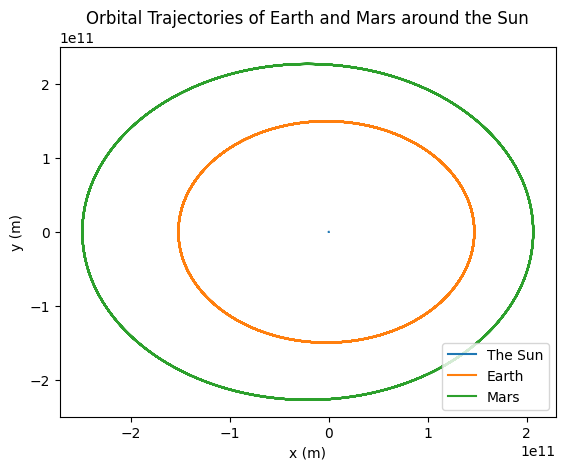

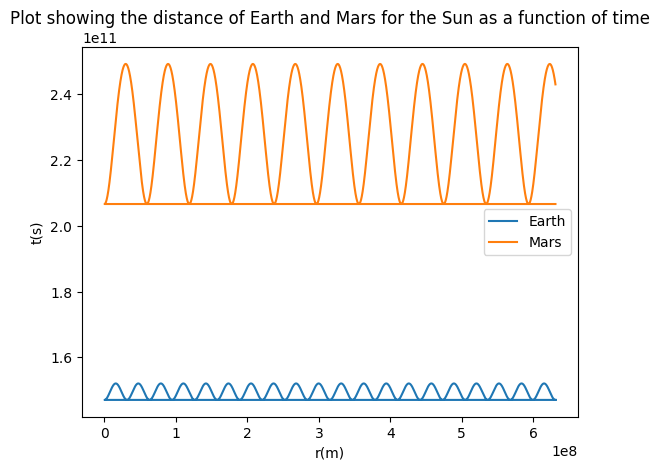

In [31]:
# Plot the trajectories of the two bodies
plt.figure()
plt.plot(x1_vals, y1_vals, label='The Sun')
plt.plot(x2_vals, y2_vals, label='Earth')
plt.plot(x3_vals, y3_vals, label='Mars')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Orbital Trajectories of Earth and Mars around the Sun')
plt.legend()
plt.show()

r_earth = np.sqrt(np.array(x2_vals)**2 + np.array(y2_vals)**2)
r_mars = np.sqrt(np.array(x3_vals)**2 + np.array(y3_vals)**2)
plt.figure()
plt.plot(t_vals, r_earth, label='Earth')
plt.plot(t_vals, r_mars, label='Mars')
plt.xlabel('r(m)')
plt.ylabel('t(s)')
plt.title('Plot showing the distance of Earth and Mars for the Sun as a function of time')
plt.legend()
plt.show()

We simulated multiple orbits by increasing the total time taken for the simulation. The plot above shows the trajectories of Earth and Mars in a total time of 20 Earth Years. The second plot above shows the distance of Earth and Mars from the center of mass as function of time. This shows that both these orbits are periodic only differing in amplitude and period.

These orbits look almost exactly the same as when we just ignored the gravitaional froce between Earth and Mars. But to be sure, we compute the eccentricities and periods.

In [32]:
### çalculating the orbital eccentricities for both Earth and Mars ###
rp_earth = np.min(np.sqrt(np.array(x2_vals)**2 + np.array(y2_vals)**2))
ra_earth = np.max(np.sqrt(np.array(x2_vals)**2 + np.array(y2_vals)**2))

rp_mars = np.min(np.sqrt(np.array(x3_vals)**2 + np.array(y3_vals)**2))
ra_mars = np.max(np.sqrt(np.array(x3_vals)**2 + np.array(y3_vals)**2))

e_earth = (ra_earth - rp_earth) / (ra_earth + rp_earth)
e_mars = (ra_mars - rp_mars) / (ra_mars + rp_mars)

print('The orbital eccentricity for Earth is: ', e_earth)
print('The orbital eccentricity for Mars is: ', e_mars)

### çalculating the orbital Period for both Earth and Mars ###
a_earth = rp_earth / (1 - e_earth)
a_mars = rp_mars / (1 - e_mars)

T_earth = 2 * np.pi * np.sqrt((a_earth**3)/(G * Msun))
T_mars = 2 * np.pi * np.sqrt((a_mars**3)/(G * Msun))

print('The orbital Period for Earth is (in Earth days): ', 20 * 365.25 * T_earth / (tmax))
print('The orbital Period for Mars is (in Earth days): ', 20 * 365.25 * T_mars / (tmax))

The orbital eccentricity for Earth is:  0.016733705353567073
The orbital eccentricity for Mars is:  0.09341763825393871
The orbital Period for Earth is (in Earth days):  365.2636244009637
The orbital Period for Mars is (in Earth days):  686.9641346758347


We can see that the presence of Mars does close to nothing to the period of Earth and the presence of Earth also does close to nothing to the period of Mars. This is because the Sun is Multiple Orders of magnitude more massive than both Earth and Mars making the force  them basically negligible.

I simulated several orbital trajectories such as venus, mercury and the sun,  

The orbital eccentricity for Venus is:  0.006823247415903535
The orbital eccentricity for Mercury is:  -1.182236786077892
The orbital Period for Venus is (in years):  224.7206255520839
The orbital Period for Mercury is (in years):  19.32015515068245


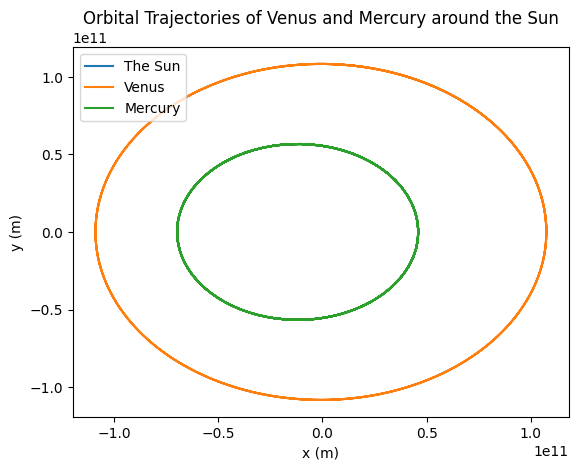

In [33]:
### Constants ###
G = 6.67430e-11             #Gravitational Constant
Msun = 1988500e24           #kg
Mvenus = 4.867e24           #kg
Mmercury = 3.30104e23          #kg
AU = 1.496e11               #m
rvenus = 0.718440*AU        #m
rmercury = 0.307499*AU         #m
vvenus = 35.26e3            #m/s
vmercury = 58.97e3             #m/s
a = 0.0
b = 1.0
rsun = 0.0

### Define the time step, maximum time, and the number of time steps that will be used in the simulation
dt = 100000
tmax = 2*365.25*24*3600     #s
n_steps = int(tmax / dt)

### Defines the initial conditions of the two planets
m1 = Msun
m2 = Mvenus
m3 = Mmercury
x1 = rsun
x2 = rvenus
x3 = rmercury
y1 = 0.0
y2 = 0.0
y3 = 0.0
vx1 = 0.0
vx2 = 0.0 
vx3 = 0.0
vy1 = 0.0
vy2 = vvenus
vy3 = vmercury

N=int(n_steps)
alp = np.array([x1, x2, x3, y1, y2, y3, vx1, vx2, vx3, vy1, vy2, vy3])
m=12

h=dt
t=a
w=[0,0,0,0,0,0,0,0,0,0,0,0]
K1=[0,0,0,0,0,0,0,0,0,0,0,0]
K2=[0,0,0,0,0,0,0,0,0,0,0,0]
K3=[0,0,0,0,0,0,0,0,0,0,0,0]
K4=[0,0,0,0,0,0,0,0,0,0,0,0]

### defines the function f that represents the system of differential equations that describe the motion of the planets. 
### The function takes in the current time t and the current values of the positions and velocities of the planets as input, 
### and returns the values of the accelerations of the planets in the x and y directions.

def f(t,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12):
    ax1 = -G*m2*(u1-u2)/((u1-u2)**2+(u4-u5)**2)**(3/2) - G*m3*(u1-u3)/((u1-u3)**2+(u4-u6)**2)**(3/2)
    ay1 = -G*m2*(u4-u5)/((u1-u2)**2+(u4-u5)**2)**(3/2) - G*m3*(u4-u6)/((u1-u3)**2+(u4-u6)**2)**(3/2)

    ax2 = -G*m3*(u2-u3)/((u2-u3)**2+(u5-u6)**2)**(3/2) - G*m1*(u2-u1)/((u2-u1)**2+(u5-u4)**2)**(3/2)
    ay2 = -G*m3*(u5-u6)/((u2-u3)**2+(u5-u6)**2)**(3/2) - G*m1*(u5-u4)/((u2-u1)**2+(u5-u4)**2)**(3/2)

    ax3 = -G*m1*(u3-u1)/((u3-u1)**2+(u6-u4)**2)**(3/2) - G*m2*(u3-u2)/((u3-u2)**2+(u6-u5)**2)**(3/2)
    ay3 = -G*m1*(u6-u4)/((u3-u1)**2+(u6-u4)**2)**(3/2) - G*m2*(u6-u5)/((u3-u2)**2+(u6-u5)**2)**(3/2)
    
    return [u7, u8, u9, u10, u11, u12, ax1, ax2, ax3, ay1, ay2, ay3]

### initializes the RK4 algorithm by setting the initial values of the positions and velocities of 
### the planets, and defining the initial time.
for j in range(m):
    w[j] = alp[j]


### initializes empty lists to store the values of the positions and velocities of the planets at each time step.
t_vals = [t]
x1_vals = [w[0]]
x2_vals = [w[1]]
x3_vals = [w[2]]
y1_vals = [w[3]]
y2_vals = [w[4]]
y3_vals = [w[5]]
vx1_vals = [w[6]]
vx2_vals = [w[7]]
vx3_vals = [w[8]]
vy1_vals = [w[9]]
vy2_vals = [w[10]]
vy3_vals = [w[11]]
    
### iterates N+1 times, where N is the total number of time steps. This loop performs 
### the numerical integration of the system of differential equations using the RK4 method.
for i in range(N+1):
    for j in range(m):
        K1[j] = h*f(t,w[0],w[1],w[2],w[3],w[4],w[5],w[6],w[7],w[8],w[9],w[10],w[11])[j]
    for j in range(m):
        K2[j] = h*f(t+h/2, w[0]+K1[0]/2, w[1]+K1[1]/2, w[2]+K1[2]/2, w[3]+K1[3]/2,
                    w[4]+K1[4]/2, w[5]+K1[5]/2, w[6]+K1[6]/2, w[7]+K1[7]/2, w[8]+K1[8]/2, 
                    w[9]+K1[9]/2, w[10]+K1[10]/2, w[11]+K1[11]/2)[j]
    for j in range(m):
        K3[j] = h*f(t+h/2, w[0]+K2[0]/2, w[1]+K2[1]/2, w[2]+K2[2]/2, w[3]+K2[3]/2,
                    w[4]+K2[4]/2, w[5]+K2[5]/2, w[6]+K2[6]/2, w[7]+K2[7]/2, w[8]+K2[8]/2, 
                    w[9]+K2[9]/2, w[10]+K2[10]/2, w[11]+K2[11]/2)[j]
    for j in range(m):
        K4[j] = h*f(t+h, w[0]+K3[0], w[1]+K3[1], w[2]+K3[2], w[3]+K3[3],
                    w[4]+K3[4], w[5]+K3[5], w[6]+K3[6], w[7]+K3[7], w[8]+K3[8], 
                    w[9]+K3[9], w[10]+K3[10], w[11]+K3[11])[j]
    for j in range(m):
        w[j] = w[j]+(K1[j]+2*K2[j]+2*K3[j]+K4[j])/6
    t=a+(i+1)*h
    t_vals.append(t)
    x1_vals.append(w[0])
    x2_vals.append(w[1])
    x3_vals.append(w[2])
    y1_vals.append(w[3])
    y2_vals.append(w[4])
    y3_vals.append(w[5])
    vx1_vals.append(w[6])
    vx2_vals.append(w[7])
    vx3_vals.append(w[8])
    vy1_vals.append(w[9])
    vy2_vals.append(w[10])
    vy3_vals.append(w[11])

### çalculating the orbital eccentricities for both Earth and Mars ###
rp_venus = np.min(np.sqrt(np.array(x2_vals)**2 + np.array(y2_vals)**2))
ra_venus = np.max(np.sqrt(np.array(x2_vals)**2 + np.array(y2_vals)**2))

rp_mercury = np.min(np.sqrt(np.array(x3_vals)**2 + np.array(y3_vals)**2))
ra_mercury = np.max(np.sqrt(np.array(x3_vals)**2 + np.array(y3_vals)**2))

e_venus = (ra_venus - rp_venus) / (ra_venus + rp_venus)
e_mercury = (ra_mercury - rp_mars) / (ra_mercury + rp_mercury)

print('The orbital eccentricity for Venus is: ', e_venus)
print('The orbital eccentricity for Mercury is: ', e_mercury)

### çalculating the orbital Period for both Earth and Mars ###
a_venus = rp_venus / (1 - e_venus)
a_mercury = rp_mercury / (1 - e_mercury)

T_venus = 2 * np.pi * np.sqrt((a_venus**3)/(G * Msun))
T_mercury = 2 * np.pi * np.sqrt((a_mercury**3)/(G * Msun))

print('The orbital Period for Venus is (in years): ', 2 * 365.25 * T_venus / (tmax))
print('The orbital Period for Mercury is (in years): ', 2 * 365.25 * T_mercury / (tmax))


# Plot the trajectories of the two bodies
# plt.figure()
plt.plot(x1_vals, y1_vals, label='The Sun')
plt.plot(x2_vals, y2_vals, label='Venus')
plt.plot(x3_vals, y3_vals, label='Mercury')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Orbital Trajectories of Venus and Mercury around the Sun')
plt.legend()
plt.show()

These Values are also we close to the literature values. I was the same with any other combination of planets too. This simulation is indeed very remarkable.

Let me try Mars and Neptune,

The orbital eccentricity for Earth is:  0.005295462407230412
The orbital eccentricity for Mars is:  0.09364722936035724
The orbital Period for Neptune is (in years):  164.05995868992795
The orbital Period for Mars is (in years):  1.880727918334515


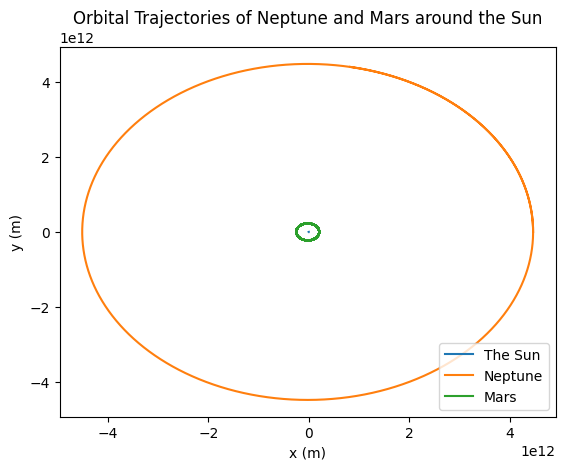

In [34]:
### Constants ###
G = 6.67430e-11             #Gravitational Constant
Msun = 1988500e24           #kg
Mearth = 1.02413e26         #kg
Mmars = 0.64171e24          #kg
AU = 1.496e11               #m
rearth = 29.81*AU           #m
rmars = 1.3813334*AU        #m
vearth = 5.47e3             #m/s
vmars = 26499.8             #m/s
a = 0.0
b = 1.0
rsun = 0.0

### Define the time step, maximum time, and the number of time steps that will be used in the simulation
dt = 100000
tmax = 200*365.25*24*3600     #s
n_steps = int(tmax / dt)

### Defines the initial conditions of the two planets
m1 = Msun
m2 = Mearth
m3 = Mmars
x1 = rsun
x2 = rearth
x3 = rmars
y1 = 0.0
y2 = 0.0
y3 = 0.0
vx1 = 0.0
vx2 = 0.0 
vx3 = 0.0
vy1 = 0.0
vy2 = vearth
vy3 = vmars

N=int(n_steps)
alp = np.array([x1, x2, x3, y1, y2, y3, vx1, vx2, vx3, vy1, vy2, vy3])
m=12

h=dt
t=a
w=[0,0,0,0,0,0,0,0,0,0,0,0]
K1=[0,0,0,0,0,0,0,0,0,0,0,0]
K2=[0,0,0,0,0,0,0,0,0,0,0,0]
K3=[0,0,0,0,0,0,0,0,0,0,0,0]
K4=[0,0,0,0,0,0,0,0,0,0,0,0]

### defines the function f that represents the system of differential equations that describe the motion of the planets. 
### The function takes in the current time t and the current values of the positions and velocities of the planets as input, 
### and returns the values of the accelerations of the planets in the x and y directions.

def f(t,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12):
    ax1 = -G*m2*(u1-u2)/((u1-u2)**2+(u4-u5)**2)**(3/2) - G*m3*(u1-u3)/((u1-u3)**2+(u4-u6)**2)**(3/2)
    ay1 = -G*m2*(u4-u5)/((u1-u2)**2+(u4-u5)**2)**(3/2) - G*m3*(u4-u6)/((u1-u3)**2+(u4-u6)**2)**(3/2)

    ax2 = -G*m3*(u2-u3)/((u2-u3)**2+(u5-u6)**2)**(3/2) - G*m1*(u2-u1)/((u2-u1)**2+(u5-u4)**2)**(3/2)
    ay2 = -G*m3*(u5-u6)/((u2-u3)**2+(u5-u6)**2)**(3/2) - G*m1*(u5-u4)/((u2-u1)**2+(u5-u4)**2)**(3/2)

    ax3 = -G*m1*(u3-u1)/((u3-u1)**2+(u6-u4)**2)**(3/2) - G*m2*(u3-u2)/((u3-u2)**2+(u6-u5)**2)**(3/2)
    ay3 = -G*m1*(u6-u4)/((u3-u1)**2+(u6-u4)**2)**(3/2) - G*m2*(u6-u5)/((u3-u2)**2+(u6-u5)**2)**(3/2)
    
    return [u7, u8, u9, u10, u11, u12, ax1, ax2, ax3, ay1, ay2, ay3]

### initializes the RK4 algorithm by setting the initial values of the positions and velocities of 
### the planets, and defining the initial time.
for j in range(m):
    w[j] = alp[j]


### initializes empty lists to store the values of the positions and velocities of the planets at each time step.
t_vals = [t]
x1_vals = [w[0]]
x2_vals = [w[1]]
x3_vals = [w[2]]
y1_vals = [w[3]]
y2_vals = [w[4]]
y3_vals = [w[5]]
vx1_vals = [w[6]]
vx2_vals = [w[7]]
vx3_vals = [w[8]]
vy1_vals = [w[9]]
vy2_vals = [w[10]]
vy3_vals = [w[11]]
    
### iterates N+1 times, where N is the total number of time steps. This loop performs 
### the numerical integration of the system of differential equations using the RK4 method.
for i in range(N+1):
    for j in range(m):
        K1[j] = h*f(t,w[0],w[1],w[2],w[3],w[4],w[5],w[6],w[7],w[8],w[9],w[10],w[11])[j]
    for j in range(m):
        K2[j] = h*f(t+h/2, w[0]+K1[0]/2, w[1]+K1[1]/2, w[2]+K1[2]/2, w[3]+K1[3]/2,
                    w[4]+K1[4]/2, w[5]+K1[5]/2, w[6]+K1[6]/2, w[7]+K1[7]/2, w[8]+K1[8]/2, 
                    w[9]+K1[9]/2, w[10]+K1[10]/2, w[11]+K1[11]/2)[j]
    for j in range(m):
        K3[j] = h*f(t+h/2, w[0]+K2[0]/2, w[1]+K2[1]/2, w[2]+K2[2]/2, w[3]+K2[3]/2,
                    w[4]+K2[4]/2, w[5]+K2[5]/2, w[6]+K2[6]/2, w[7]+K2[7]/2, w[8]+K2[8]/2, 
                    w[9]+K2[9]/2, w[10]+K2[10]/2, w[11]+K2[11]/2)[j]
    for j in range(m):
        K4[j] = h*f(t+h, w[0]+K3[0], w[1]+K3[1], w[2]+K3[2], w[3]+K3[3],
                    w[4]+K3[4], w[5]+K3[5], w[6]+K3[6], w[7]+K3[7], w[8]+K3[8], 
                    w[9]+K3[9], w[10]+K3[10], w[11]+K3[11])[j]
    for j in range(m):
        w[j] = w[j]+(K1[j]+2*K2[j]+2*K3[j]+K4[j])/6
    t=a+(i+1)*h
    t_vals.append(t)
    x1_vals.append(w[0])
    x2_vals.append(w[1])
    x3_vals.append(w[2])
    y1_vals.append(w[3])
    y2_vals.append(w[4])
    y3_vals.append(w[5])
    vx1_vals.append(w[6])
    vx2_vals.append(w[7])
    vx3_vals.append(w[8])
    vy1_vals.append(w[9])
    vy2_vals.append(w[10])
    vy3_vals.append(w[11])

### çalculating the orbital eccentricities for both Earth and Mars ###
rp_earth = np.min(np.sqrt(np.array(x2_vals)**2 + np.array(y2_vals)**2))
ra_earth = np.max(np.sqrt(np.array(x2_vals)**2 + np.array(y2_vals)**2))

rp_mars = np.min(np.sqrt(np.array(x3_vals)**2 + np.array(y3_vals)**2))
ra_mars = np.max(np.sqrt(np.array(x3_vals)**2 + np.array(y3_vals)**2))

e_earth = (ra_earth - rp_earth) / (ra_earth + rp_earth)
e_mars = (ra_mars - rp_mars) / (ra_mars + rp_mars)

print('The orbital eccentricity for Earth is: ', e_earth)
print('The orbital eccentricity for Mars is: ', e_mars)

### çalculating the orbital Period for both Earth and Mars ###
a_earth = rp_earth / (1 - e_earth)
a_mars = rp_mars / (1 - e_mars)

T_earth = 2 * np.pi * np.sqrt((a_earth**3)/(G * Msun))
T_mars = 2 * np.pi * np.sqrt((a_mars**3)/(G * Msun))

print('The orbital Period for Neptune is (in years): ', 200 * T_earth / (tmax))
print('The orbital Period for Mars is (in years): ', 200 * T_mars / (tmax))


# Plot the trajectories of the two bodies
# plt.figure()
plt.plot(x1_vals, y1_vals, label='The Sun')
plt.plot(x2_vals, y2_vals, label='Neptune')
plt.plot(x3_vals, y3_vals, label='Mars')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Orbital Trajectories of Neptune and Mars around the Sun')
plt.legend()
plt.show()

Again, these values are very close to the literature values. I also varied the initial conditions for the original Earth-Mars configuration. The orientation of the ellipses changed but the Period didn't change. I submitted a few images showing this.